In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ast import literal_eval

from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yunli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('../data/interim/combine.csv')
sns.set_style('darkgrid')

In [4]:
dfc = pd.read_csv('../data/interim/combine_clean_oh.csv')

# Univarite Analysis

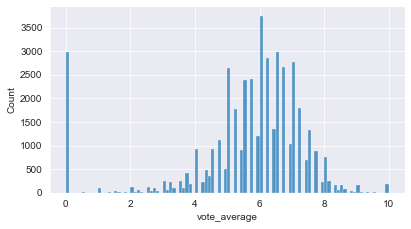

In [5]:
# for target variable
g = sns.displot(df['vote_average'],kind='hist')
g.fig.set_figwidth(6)
g.fig.set_figheight(3)

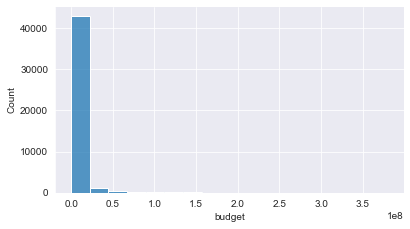

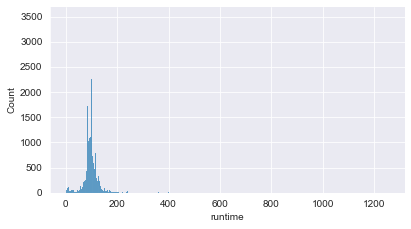

In [6]:
# numeric features
g = sns.displot(df['budget'],kind='hist')
g.fig.set_figwidth(6)
g.fig.set_figheight(3)

g = sns.displot(df['runtime'],kind='hist')
g.fig.set_figwidth(6)
g.fig.set_figheight(3)

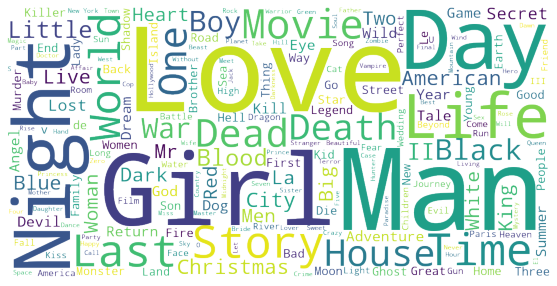

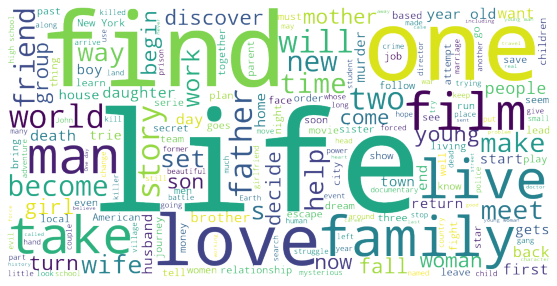

In [46]:
# text features
def plotwc(string):
    '''
    function for plotting the wordclouds
    '''
    wc = WordCloud(width=1000,height=500,
                   background_color="rgba(255, 255, 255, 0)",
                   mode="RGBA").generate(string)
    plt.figure(figsize=(10,5))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

string = " ".join(df['title'].dropna().values)
plotwc(string)

string = " ".join(df['overview'].dropna().values)
plotwc(string)

C:\Users\yunli\.conda\envs\ee541\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


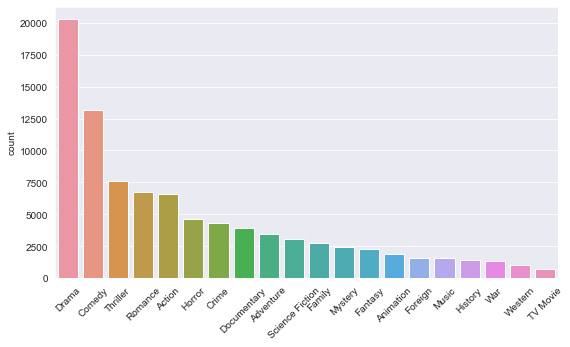

In [91]:
# categorical features
lst = []
for i in df['genres'].dropna().apply(literal_eval):
    if i is not np.nan:
        lst += i

plt.figure(figsize=(9,5))
sns.countplot(lst, order=pd.Series(lst).value_counts().index)
plt.xticks(rotation=45)
plt.show()

# Bivariate Analysis

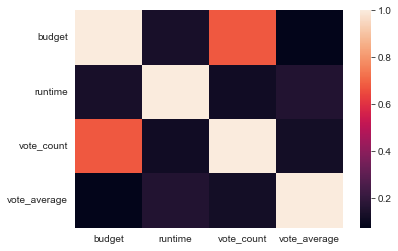

In [100]:
# numeric feature
sns.heatmap(df[['budget','runtime','vote_count','vote_average']].corr())
plt.show()